<a href="https://colab.research.google.com/github/Emmanuel-Favour/Rain-Prediction/blob/main/Australian_Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rain Prediction With Logistics Regression Using Python Scikit-Learn

1.  What is Logistics Regression?

> Logistics Regression is a binary classification supervised learning model that estimates the probability of an event happening based on a given dataset of features(Independent Variables). It is the appropriate regression analysis conducted when the dependent variable is dichotomous or binary, It makes use of a logistic  function to produce a probability value from a linear function output.


2. Logistic Regression Intuition.

> Logistics Regression also called Logit function, is a statistical method used for binary classification problems, where the outcome variable is categorical and has only two possible values (typically 0 and 1). Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm.



> Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has only two possible values (typically 0 and 1). Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm.
The intuition behind Logistic Regression can be understood by considering the logistic function, also known as the sigmoid function. The sigmoid function has an S-shaped curve and maps any real-valued number to the range of 0 and 1. The logistic function is defined as:

$$
S(Z)=  1/(1+ e^-(z) )
$$

> Here, z is the linear combination of the input features and their associated weights. It represents the weighted sum of the input features, where each feature is multiplied by its corresponding weight. Mathematically, z can be expressed as:

$$
Z= W_0+ W_1 X_1+ W_2 X_2+ W_n
$$

Here:
> $W_0$ is the bias or intercept term.
$W_1$ ,$W_2$,…..,$W_n$ are the weights associated with features $X_1$,$X_2$,…..,$X_n$, respectively.

>This probability is used to make decisions in classification tasks. If the probability is greater than a threshold (usually 0.5), the instance is predicted to belong to the positive class; otherwise, it is predicted to belong to the negative class.


3. The Case Study.



> In this project, the aim is to determine if there will be rain in Australia tomorrow. The approach involves implementing Logistic Regression using Python and Scikit-Learn.

> The objective is to create a classifier that can predict the likelihood of rain tomorrow in Australia. This is achieved by training a binary classification model using Logistic Regression. The dataset employed for this project is the Rain in Australia dataset sourced from Kaggle



4. Dataset Source and Description.


> The dataset was sourced from Kaggle online data repository.[Kaggle Data Repository](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

- **Content**

> This dataset contains about 10 years of daily weather observations from many locations across Australia.
**RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.**

- **Context**

> Predict next-day rain by training classification models on the target variable RainTomorrow.














5. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

6. Import Dataset.

In [ ]:
df = pd.read_csv("Logistic Regression\weatherAUS.csv")

7. Data Preprocessing.


> Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning and transforming raw data into a format that is suitable for analysis or for training machine learning models. The goal of data preprocessing is to improve the quality of the data, make it more understandable, and enhance the performance of machine learning algorithms. The specific steps involved in data preprocessing can vary based on the nature of the data and the objectives of the analysis or modeling task. Here are some common data preprocessing tasks:

1. Data Cleaning:


> 1. Handling missing values: Imputing missing values or removing rows/columns with missing data.
2. Dealing with outliers: Identifying and addressing data points that significantly deviate from the norm.
3. Correcting errors: Fixing inaccuracies or errors in the data.



2. Data Transformation:


> 1. Feature scaling: Scaling numerical features to a standard range (e.g., normalization or standardization).
2. Log transformation: Applying logarithmic transformations to handle skewed distributions.
3. Binning or discretization: Grouping continuous data into bins or discrete categories.


3. Handling Categorical Data:


> 1. One-hot encoding: Converting categorical variables into binary (0/1) vectors.
2. Label encoding: Assigning numerical labels to categorical variables.
3. Binary encoding: Representing categorical variables as binary strings.


4. Handling Text Data:


> 1. Tokenization: Breaking text into individual words or tokens.
2. Removing stop words: Eliminating common words that do not contribute much to the meaning.
3. Text vectorization: Converting text data into numerical representations (e.g., TF-IDF or word embeddings).


5. Data Integration:


> 1. Combining data from multiple sources or datasets.
2. Resolving inconsistencies or conflicts between datasets.\


6. Data Reduction:


> 1. Dimensionality reduction: Reducing the number of features while preserving important information (e.g., using techniques like Principal Component Analysis or feature selection methods).

7. Handling Time Series Data:


> 1. Resampling: Adjusting the frequency of time series data.
2. Feature engineering: Creating new features from time-related information (e.g., day of the week, month, season).

Dealing with Imbalanced Data:

Balancing the distribution of classes in classification problems.




In [ ]:
#View the head of the dataset(first few rows)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
#View dimension of dataset.
df.shape

(145460, 23)

There are 145460 observations and 23 Variables


In [ ]:
#View the variables present
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])
# Compute the correlation matrix
corr = numeric_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,year,Month,Day
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.083936,0.039245,-0.204279,0.001507
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.159237,0.058388,-0.164622,-0.000495
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.239032,-0.009284,-0.030863,0.001134
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.119285,0.084141,-0.027912,-0.007770
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.450768,0.011678,0.023885,-0.001173
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.234010,-0.032708,0.060918,-0.009226
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.090995,-0.021620,0.051039,-0.009183
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.087817,-0.032806,0.061006,-0.009969
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.257161,0.010708,-0.090564,0.015610
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.446160,-0.009150,-0.018541,0.013207


From the correlation map, there's nothing suprising as many of the features are moderately correlated with the target feature except for a few features like WindSpeed, Tem9am, year month and day that shows very weak correlation.

Checking for duplicates

In [ ]:
df.duplicated().sum()

0

There are zero duplicated rows in the dataset.

Checking for Null values and other information about the dataset

In [ ]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# Drop missing values in the 'RainTomorrow' column and update the DataFrame in place
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Deductions from the information above;

*   Some columns contain null values
*   The Dataset consist of two major datatype shich are the 7 Cartegorical Data(Object) and the 16 numerical datatype(float64).
*   The Date column consist of a wrong datatype object instead of Datetime.






Cartegorical Variables in the Dataset

In [ ]:
#Viewing the cartegorical variables pressent.
cartegorical_data = [cartegory for cartegory in df.columns if df[cartegory].dtype == 'object']
df[cartegorical_data].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


Checking for Cardinality in Cartegorical Variables.


> In simple contest, cardinality means the numbers of unique labels present in a feature or attribute, just like in cardinality of a set which simply means the number of element in that set. Usually, higher cardinally pose serious issues in machine learning,  machine learning models might memorize specific instances or noise in the training data rather than learning general patterns. This can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.


In [ ]:
#Checking for the number of unique labels in each columns
df[cartegorical_data].nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64


> It can be seen that the Date feature Possess a high cardinality compared to other cartegorical feature.




Data quality checks on the Cartegorical variables.


In [ ]:
#Inspecting the unique location names to ensure proper representation.
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

The Location Variable is in order as it contains no spelling error or null values.

In [ ]:
#Checking the unique labels in WindGustDir
df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'], dtype=object)

The  WindGustDir does not contain spelling error but missing value which eventually will be handled using the modal class

In [ ]:
#Checking the unique labels in WindDir9am
df.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

The  WindDir9am does not contain spelling error but missing value which eventually will be handled using the modal class

In [ ]:
#Checking the unique labels in WindDir3pm
df.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

The  WindDir9am does not contain spelling error but missing value which eventually will be handled using the modal class

It is worthy of note that the RainToday label, and the RainTomorrow variable the later of which is the target variable consist of missing fields.

Numerical Variables in the  dataset

In [ ]:
#Getting the Numerical variables from the dataset.
Numerical = [numeric for numeric in df.columns if df[numeric].dtype != 'O']

df[Numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [ ]:
#Getting the count of unique variables in each column containing Numerical dtypes
df[Numerical].nunique()

MinTemp          389
MaxTemp          505
Rainfall         679
Evaporation      356
Sunshine         145
WindGustSpeed     67
WindSpeed9am      43
WindSpeed3pm      44
Humidity9am      101
Humidity3pm      101
Pressure9am      546
Pressure3pm      549
Cloud9am          10
Cloud3pm          10
Temp9am          440
Temp3pm          500
dtype: int64

Checking for Outliers in Data set

In [ ]:
 #Getting a statistical description of the data
 df[Numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000




> Some of the columns in the Numerical variables contain outliers, this is seen from the above description, some of the columns above are; Rainfall, Evaporation, WindSpeed9am.




In [ ]:
#Creating a Visualisation class
class DistributionVisualizer:
    def __init__(self, df, columns_to_plot):
        """
        Initialize the DistributionVisualizer.

        Parameters:
        - df: DataFrame
        - columns_to_plot: List of column names to visualize
        """
        self.df = df
        self.columns_to_plot = columns_to_plot
        self.colors = ['blue', 'green', 'orange', 'red']
        # Adjust the figsize here to set the size of the figure
        self.fig, self.axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
        self.axes = self.axes.flatten()

    def plot_histograms(self):
        """Plot histograms for specified columns."""
        for i, col in enumerate(self.columns_to_plot):
            self.axes[i].hist(self.df[col], bins=10, color=self.colors[i], alpha=0.7, density=True)
            self.axes[i].set_title(f'{col} Distribution')
            self.axes[i].set_xlabel('Values')
            self.axes[i].set_ylabel('Density')  # Change ylabel to 'Density' for KDE
            self.axes[i].grid(which='major')
             # Add a centered title for the whole figure
            self.fig.suptitle('Histograms and KDE Plots')

    def plot_kde_plots(self):
        """Plot KDE plots for specified columns."""
        for i, col in enumerate(self.columns_to_plot):
            sns.kdeplot(self.df[col], color='red', bw_adjust=3, ax=self.axes[i])

    def plot_violin_plots(self):
        """Plot Violin plots for specified columns."""
        for i, col in enumerate(self.columns_to_plot):
            sns.violinplot(x=self.df[col], ax=self.axes[i], color=self.colors[i], orient='h')
            self.fig.suptitle('Violin Plot')




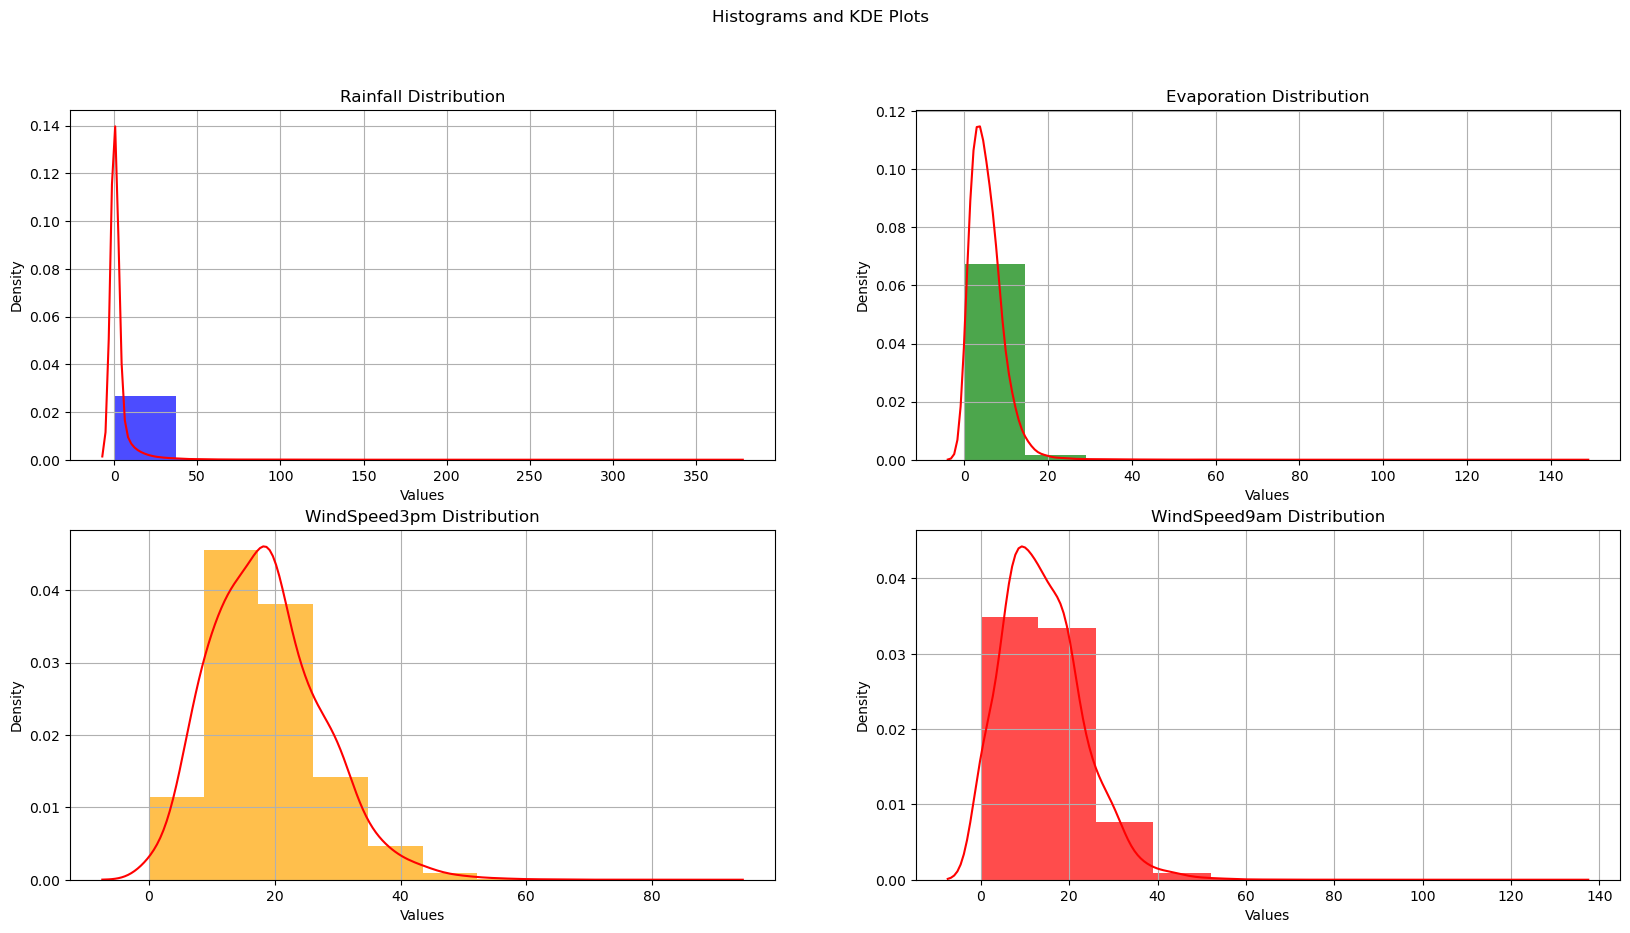

In [ ]:
visualizer = DistributionVisualizer(df, ['Rainfall', 'Evaporation', 'WindSpeed3pm', 'WindSpeed9am'])
visualizer.plot_histograms()
visualizer.plot_kde_plots()

It can be seen from the visualization that the shape of most of the subplots distribution from the cartegorical variables that were earlier suspected to contain otliers are skewed to the right. This can be further ascertained with a Violin plot below.


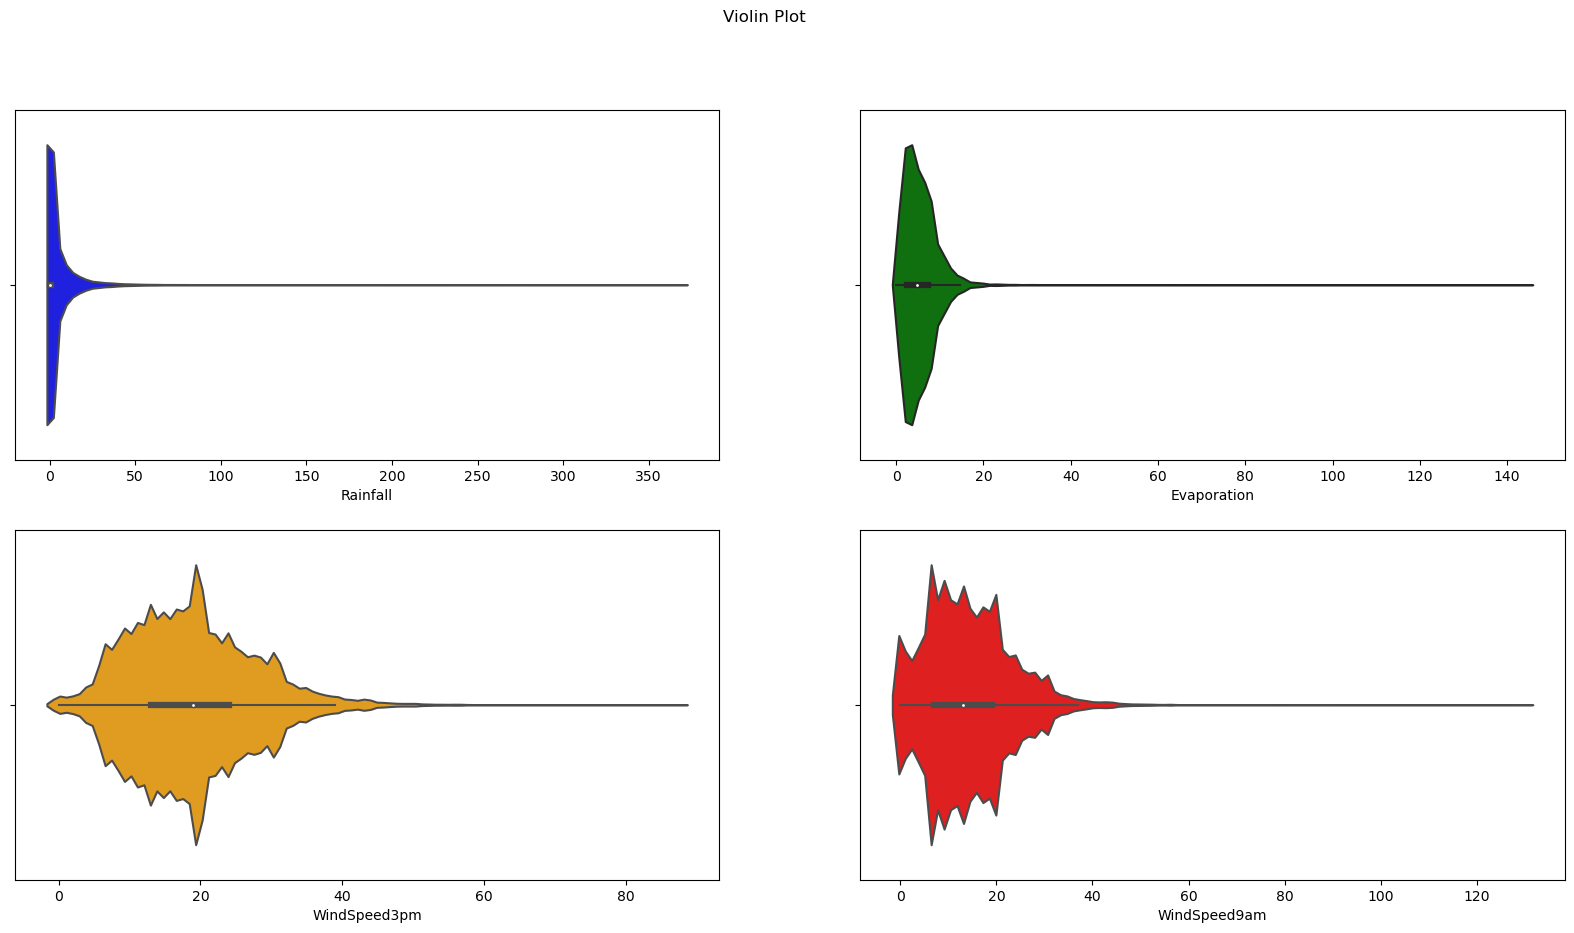

In [ ]:
#Calling the DistributionVisualizer function
visualizer = DistributionVisualizer(df, ['Rainfall', 'Evaporation', 'WindSpeed3pm', 'WindSpeed9am'])
visualizer.plot_violin_plots()


We can see from the violin plot that each of the 4 columns contains outliers which may not be good for our machine learning model as they can significantly have bad influence on our machine learning model performance,  some of this effect could be Overfitting(Biased model), poor accuracy, and could result in some feature engineering problems.

Feature Engineering.

> Feature engineering is the process of selecting, transforming, or creating new features (variables) from raw data to enhance the performance of a machine learning model. The quality of features used in a model can significantly impact its ability to make accurate predictions or classifications. Feature engineering involves



Engineering the date column.

*   Converting datatype from object to Datetime
*   Reducing the Cardinality of the Date column to Day, Year and Month.



In [ ]:
#Gettingsum of  missing values
df[cartegorical_data].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [ ]:
#Checking the columns with the Cvartegorical dtypes
df[cartegorical_data].columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
#Convert the Date column to Datetime dtype.
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
#Extracting year from the Date column
df["year"] = df["Date"].dt.year
df["year"]

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
145454    2017
145455    2017
145456    2017
145457    2017
145458    2017
Name: year, Length: 142193, dtype: int32

In [ ]:
#Extracting Month from the Date column
df["Month"] = df["Date"].dt.month
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145454     6
145455     6
145456     6
145457     6
145458     6
Name: Month, Length: 142193, dtype: int32

In [ ]:
#Extracting Day from the Date column
df["Day"] = df["Date"].dt.day
df["Day"]

0          1
1          2
2          3
3          4
4          5
          ..
145454    20
145455    21
145456    22
145457    23
145458    24
Name: Day, Length: 142193, dtype: int32

In [ ]:
#dropping the Date column
df.drop("Date", axis = 1, inplace = True)

In [ ]:
#To check for the new variables created and as well ensure the Date column was dropped.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

In [ ]:
# Drop missing values in the 'RainTomorrow' column and update the DataFrame in place
df.dropna(subset=['RainTomorrow'], inplace=True)


In [ ]:
#Checking for null values in Rain tomorrow

df["RainTomorrow"].isnull().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

Splitting the dataset.

In [ ]:
X = df.drop(["RainTomorrow"], axis = 1)
y = df["RainTomorrow"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.2, random_state = 40)

In [ ]:
X_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'year', 'Month', 'Day'],
      dtype='object')

In [ ]:
y_train.isnull().sum()

0

In [ ]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,113236.000000,113491.000000,112616.000000,65057.000000,59508.000000,106380.000000,112685.000000,111672.000000,112343.000000,110899.000000,102567.000000,102576.000000,70826.000000,68097.000000,113033.000000,111590.000000,113754.00000,113754.000000,113754.000000
mean,12.172184,23.211167,2.346719,5.471373,7.625837,39.962737,13.972028,18.621418,68.871332,51.474423,1017.672101,1015.277424,4.439669,4.504868,16.972435,21.676528,2012.75796,6.402737,15.716845
std,6.396844,7.110265,8.464400,4.218382,3.782740,13.577714,8.879193,8.795565,19.036775,20.782539,7.094216,7.024219,2.885578,2.719139,6.485754,6.934755,2.54211,3.424937,8.796428
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.00000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,2011.00000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,2013.00000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,2015.00000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000,2017.00000,12.000000,31.000000


In [ ]:
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,28320.000000,28380.000000,28171.000000,16293.000000,14869.000000,26543.000000,28160.000000,27891.000000,28076.000000,27684.000000,25612.000000,25636.000000,17710.000000,17002.000000,28256.000000,27877.000000,28439.000000,28439.000000,28439.000000
mean,12.243242,23.289235,2.362987,5.463641,7.620916,40.070678,14.121875,18.702270,68.733687,51.515388,1017.580302,1015.181299,4.427273,4.496353,17.047806,21.730093,2012.762791,6.401772,15.708042
std,6.428761,7.146731,8.468399,4.067303,3.776782,13.633058,8.948868,8.834289,19.109215,20.859026,7.150058,7.085918,2.892817,2.726675,6.520866,6.948905,2.537875,3.432834,8.805189
min,-7.800000,-2.700000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,986.300000,985.500000,0.000000,0.000000,-7.000000,-3.800000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.800000,21.200000,2013.000000,6.000000,16.000000
75%,17.000000,28.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.700000,26.400000,2015.000000,9.000000,23.000000
max,30.200000,47.300000,208.500000,77.300000,14.100000,124.000000,74.000000,72.000000,100.000000,100.000000,1040.900000,1038.200000,8.000000,8.000000,39.400000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,Month,Day
10087,CoffsHarbour,20.9,27.5,23.8,2.6,3.2,NNE,48.0,NNE,NNE,...,1012.1,1009.7,8.0,8.0,23.8,22.7,Yes,2011,11,26
74047,Nhil,13.9,24.2,0.0,NaN,NaN,S,61.0,SSE,S,...,1009.5,1007.6,NaN,NaN,17.8,22.6,No,2014,12,6
108632,Albany,17.5,24.7,1.0,4.2,12.4,NaN,NaN,ENE,ENE,...,1013.9,1011.3,7.0,6.0,21.5,23.0,No,2009,1,31
94921,Townsville,15.1,27.4,0.0,6.6,10.6,ENE,43.0,SE,ENE,...,1021.7,1018.1,1.0,1.0,23.8,25.6,No,2013,8,27
75133,Portland,9.7,15.1,4.4,0.2,0.0,E,20.0,NNE,SW,...,1021.9,1018.3,8.0,6.0,10.3,14.1,Yes,2009,6,3


In [ ]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,Month,Day
129367,Walpole,16.3,23.6,1.0,NaN,NaN,ESE,39.0,E,SE,...,1019.7,1017.3,NaN,NaN,19.8,21.5,No,2016,3,12
9799,CoffsHarbour,22.2,26.2,14.2,2.6,1.3,NE,48.0,NE,NE,...,1012.5,1012.1,8.0,8.0,22.6,23.3,Yes,2011,1,12
118871,PerthAirport,11.9,20.8,0.0,2.4,1.5,N,48.0,N,N,...,1018.0,1013.1,7.0,7.0,15.2,20.4,No,2012,6,26
18132,NorahHead,14.5,23.8,0.0,NaN,NaN,NNE,41.0,SSW,E,...,1021.7,1020.1,NaN,NaN,20.1,22.7,No,2009,1,18
133227,Launceston,5.3,10.9,0.0,4.4,NaN,S,39.0,ESE,SSE,...,1018.3,1018.4,NaN,NaN,6.3,10.7,No,2009,6,15


In [ ]:
dfX1 = [cartegory for cartegory in X_train if X_train[cartegory].dtypes == "O"]
dfX2 = [cartegory for cartegory in X_test if X_test[cartegory].dtypes == "O"]
dfX1 = X_train[dfX1]
dfX2 = X_test[dfX2]

In [ ]:
dfX3 = [Numeric for Numeric in X_train if X_train[Numeric].dtypes != "O"]
dfX4 = [Numeric for Numeric in X_test if X_test[Numeric].dtypes != "O"]
dfX3 = X_train[dfX3]
dfX4 = X_test[dfX4]

In [ ]:
dfX3.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,113236.000000,113491.000000,112616.000000,65057.000000,59508.000000,106380.000000,112685.000000,111672.000000,112343.000000,110899.000000,102567.000000,102576.000000,70826.000000,68097.000000,113033.000000,111590.000000,113754.00000,113754.000000,113754.000000
mean,12.172184,23.211167,2.346719,5.471373,7.625837,39.962737,13.972028,18.621418,68.871332,51.474423,1017.672101,1015.277424,4.439669,4.504868,16.972435,21.676528,2012.75796,6.402737,15.716845
std,6.396844,7.110265,8.464400,4.218382,3.782740,13.577714,8.879193,8.795565,19.036775,20.782539,7.094216,7.024219,2.885578,2.719139,6.485754,6.934755,2.54211,3.424937,8.796428
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.00000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,2011.00000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,2013.00000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,2015.00000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000,2017.00000,12.000000,31.000000


In [ ]:
dfX4.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,28320.000000,28380.000000,28171.000000,16293.000000,14869.000000,26543.000000,28160.000000,27891.000000,28076.000000,27684.000000,25612.000000,25636.000000,17710.000000,17002.000000,28256.000000,27877.000000,28439.000000,28439.000000,28439.000000
mean,12.243242,23.289235,2.362987,5.463641,7.620916,40.070678,14.121875,18.702270,68.733687,51.515388,1017.580302,1015.181299,4.427273,4.496353,17.047806,21.730093,2012.762791,6.401772,15.708042
std,6.428761,7.146731,8.468399,4.067303,3.776782,13.633058,8.948868,8.834289,19.109215,20.859026,7.150058,7.085918,2.892817,2.726675,6.520866,6.948905,2.537875,3.432834,8.805189
min,-7.800000,-2.700000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,986.300000,985.500000,0.000000,0.000000,-7.000000,-3.800000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.800000,21.200000,2013.000000,6.000000,16.000000
75%,17.000000,28.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.700000,26.400000,2015.000000,9.000000,23.000000
max,30.200000,47.300000,208.500000,77.300000,14.100000,124.000000,74.000000,72.000000,100.000000,100.000000,1040.900000,1038.200000,8.000000,8.000000,39.400000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
dfX4.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
10087,20.9,27.5,23.8,2.6,3.2,48.0,26.0,26.0,76.0,90.0,1012.1,1009.7,8.0,8.0,23.8,22.7,2011,11,26
74047,13.9,24.2,0.0,NaN,NaN,61.0,31.0,35.0,61.0,45.0,1009.5,1007.6,NaN,NaN,17.8,22.6,2014,12,6
108632,17.5,24.7,1.0,4.2,12.4,NaN,11.0,39.0,70.0,74.0,1013.9,1011.3,7.0,6.0,21.5,23.0,2009,1,31
94921,15.1,27.4,0.0,6.6,10.6,43.0,15.0,33.0,58.0,54.0,1021.7,1018.1,1.0,1.0,23.8,25.6,2013,8,27
75133,9.7,15.1,4.4,0.2,0.0,20.0,9.0,7.0,97.0,82.0,1021.9,1018.3,8.0,6.0,10.3,14.1,2009,6,3


In [ ]:
dfX1

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
129367,Walpole,ESE,E,SE,No
9799,CoffsHarbour,NE,NE,NE,Yes
118871,PerthAirport,N,N,N,No
18132,NorahHead,NNE,SSW,E,No
133227,Launceston,S,ESE,SSE,No
...,...,...,...,...,...
56013,Ballarat,NNE,NNE,NNE,No
58200,Bendigo,NNW,E,NNW,No
95634,Townsville,NE,SSE,NE,No
31409,Sydney,SW,W,WNW,Yes


In [ ]:
dfX3

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
129367,16.3,23.6,1.0,NaN,NaN,39.0,15.0,24.0,78.0,79.0,1019.7,1017.3,NaN,NaN,19.8,21.5,2016,3,12
9799,22.2,26.2,14.2,2.6,1.3,48.0,19.0,22.0,95.0,96.0,1012.5,1012.1,8.0,8.0,22.6,23.3,2011,1,12
118871,11.9,20.8,0.0,2.4,1.5,48.0,20.0,19.0,39.0,44.0,1018.0,1013.1,7.0,7.0,15.2,20.4,2012,6,26
18132,14.5,23.8,0.0,NaN,NaN,41.0,11.0,22.0,66.0,54.0,1021.7,1020.1,NaN,NaN,20.1,22.7,2009,1,18
133227,5.3,10.9,0.0,4.4,NaN,39.0,7.0,13.0,80.0,64.0,1018.3,1018.4,NaN,NaN,6.3,10.7,2009,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56013,6.1,12.4,0.0,NaN,NaN,44.0,28.0,26.0,79.0,72.0,1036.7,1032.8,5.0,NaN,9.1,11.9,2011,6,30
58200,18.2,42.2,0.0,9.2,NaN,33.0,11.0,7.0,25.0,8.0,1012.8,1010.0,0.0,1.0,29.5,40.7,2009,1,28
95634,12.2,26.9,0.0,5.2,9.9,35.0,9.0,20.0,68.0,43.0,1020.4,1017.0,1.0,1.0,21.9,25.3,2015,8,10
31409,9.6,20.3,1.4,1.0,7.0,39.0,22.0,4.0,90.0,49.0,1018.5,1015.0,NaN,NaN,11.2,18.5,2011,7,18


Engineering Outliers in the Numerical Data set.

In [ ]:
# Calculate the IQR for the column
def replace_outliers_with_upper_bound(train_df, test_df, column_name):
    # Calculate IQR based on the training data (dfX3)
    q1_train = train_df[column_name].quantile(0.25)
    q3_train = train_df[column_name].quantile(0.75)
    iqr_train = q3_train - q1_train

    # Define the upper bound for outliers based on training data
    iqr_multiplier = 1.5
    upper_bound_train = q3_train + iqr_multiplier * iqr_train

    # Identify outliers in test data based on the upper bound from training data
    outliers_mask_train = train_df[column_name] > upper_bound_train
    outliers_mask_test = test_df[column_name] > upper_bound_train

    # Replace outliers in test data with the upper bound from training data
    train_df.loc[outliers_mask_train, column_name] = upper_bound_train
    test_df.loc[outliers_mask_test, column_name] = upper_bound_train

    # Display the upper bound used for replacement
    print("Upper Bound for {}: {}".format(column_name, upper_bound_train))
    print("Number of values replaced in {}: {}".format(column_name, sum(outliers_mask_test)))
    print("Updated Test DataFrame:")
    print(test_df)



In [ ]:
# Replace outliers in dfX4 with upper bound from dfX3
replace_outliers_with_upper_bound(dfX3, dfX4, 'Rainfall')

Upper Bound for Rainfall: 1.5
Number of values replaced in Rainfall: 5765
Updated Test DataFrame:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
10087      20.9     27.5       1.5          2.6       3.2           48.0   
74047      13.9     24.2       0.0          NaN       NaN           61.0   
108632     17.5     24.7       1.0          4.2      12.4            NaN   
94921      15.1     27.4       0.0          6.6      10.6           43.0   
75133       9.7     15.1       1.5          0.2       0.0           20.0   
...         ...      ...       ...          ...       ...            ...   
24435      10.7     16.7       1.5          NaN       NaN           22.0   
18051      16.6     23.2       0.0          NaN       NaN            NaN   
13424      17.9     33.7       0.0         10.6      10.3            NaN   
76703      11.8     27.7       0.0          5.8      13.0           33.0   
76363       1.5     17.0       0.0          5.2      10.3         

In [ ]:
print(dfX3['Rainfall'].max())

dfX3.describe()

1.5


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,113236.000000,113491.000000,112616.000000,65057.000000,59508.000000,106380.000000,112685.000000,111672.000000,112343.000000,110899.000000,102567.000000,102576.000000,70826.000000,68097.000000,113033.000000,111590.000000,113754.00000,113754.000000,113754.000000
mean,12.172184,23.211167,0.388416,5.471373,7.625837,39.962737,13.972028,18.621418,68.871332,51.474423,1017.672101,1015.277424,4.439669,4.504868,16.972435,21.676528,2012.75796,6.402737,15.716845
std,6.396844,7.110265,0.611592,4.218382,3.782740,13.577714,8.879193,8.795565,19.036775,20.782539,7.094216,7.024219,2.885578,2.719139,6.485754,6.934755,2.54211,3.424937,8.796428
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.00000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,2011.00000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,2013.00000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,2015.00000,9.000000,23.000000
max,33.900000,48.100000,1.500000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000,2017.00000,12.000000,31.000000


In [ ]:
print(dfX4['Rainfall'].max())
dfX4.describe()

1.5


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,28320.000000,28380.000000,28171.000000,16293.000000,14869.000000,26543.000000,28160.000000,27891.000000,28076.000000,27684.000000,25612.000000,25636.000000,17710.000000,17002.000000,28256.000000,27877.000000,28439.000000,28439.000000,28439.000000
mean,12.243242,23.289235,0.392787,5.463641,7.620916,40.070678,14.121875,18.702270,68.733687,51.515388,1017.580302,1015.181299,4.427273,4.496353,17.047806,21.730093,2012.762791,6.401772,15.708042
std,6.428761,7.146731,0.614258,4.067303,3.776782,13.633058,8.948868,8.834289,19.109215,20.859026,7.150058,7.085918,2.892817,2.726675,6.520866,6.948905,2.537875,3.432834,8.805189
min,-7.800000,-2.700000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,986.300000,985.500000,0.000000,0.000000,-7.000000,-3.800000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.800000,21.200000,2013.000000,6.000000,16.000000
75%,17.000000,28.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.700000,26.400000,2015.000000,9.000000,23.000000
max,30.200000,47.300000,1.500000,77.300000,14.100000,124.000000,74.000000,72.000000,100.000000,100.000000,1040.900000,1038.200000,8.000000,8.000000,39.400000,46.700000,2017.000000,12.000000,31.000000


In [ ]:

replace_outliers_with_upper_bound(dfX3, dfX4, 'Evaporation')

Upper Bound for Evaporation: 14.600000000000001
Number of values replaced in Evaporation: 378
Updated Test DataFrame:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
10087      20.9     27.5       1.5          2.6       3.2           48.0   
74047      13.9     24.2       0.0          NaN       NaN           61.0   
108632     17.5     24.7       1.0          4.2      12.4            NaN   
94921      15.1     27.4       0.0          6.6      10.6           43.0   
75133       9.7     15.1       1.5          0.2       0.0           20.0   
...         ...      ...       ...          ...       ...            ...   
24435      10.7     16.7       1.5          NaN       NaN           22.0   
18051      16.6     23.2       0.0          NaN       NaN            NaN   
13424      17.9     33.7       0.0         10.6      10.3            NaN   
76703      11.8     27.7       0.0          5.8      13.0           33.0   
76363       1.5     17.0       0.0          5.

In [ ]:
replace_outliers_with_upper_bound(dfX3, dfX4, 'WindSpeed3pm')

Upper Bound for WindSpeed3pm: 40.5
Number of values replaced in WindSpeed3pm: 502
Updated Test DataFrame:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
10087      20.9     27.5       1.5          2.6       3.2           48.0   
74047      13.9     24.2       0.0          NaN       NaN           61.0   
108632     17.5     24.7       1.0          4.2      12.4            NaN   
94921      15.1     27.4       0.0          6.6      10.6           43.0   
75133       9.7     15.1       1.5          0.2       0.0           20.0   
...         ...      ...       ...          ...       ...            ...   
24435      10.7     16.7       1.5          NaN       NaN           22.0   
18051      16.6     23.2       0.0          NaN       NaN            NaN   
13424      17.9     33.7       0.0         10.6      10.3            NaN   
76703      11.8     27.7       0.0          5.8      13.0           33.0   
76363       1.5     17.0       0.0          5.2      10.3 

In [ ]:
replace_outliers_with_upper_bound(dfX3, dfX4, 'WindSpeed9am')

Upper Bound for WindSpeed9am: 37.0
Number of values replaced in WindSpeed9am: 362
Updated Test DataFrame:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
10087      20.9     27.5       1.5          2.6       3.2           48.0   
74047      13.9     24.2       0.0          NaN       NaN           61.0   
108632     17.5     24.7       1.0          4.2      12.4            NaN   
94921      15.1     27.4       0.0          6.6      10.6           43.0   
75133       9.7     15.1       1.5          0.2       0.0           20.0   
...         ...      ...       ...          ...       ...            ...   
24435      10.7     16.7       1.5          NaN       NaN           22.0   
18051      16.6     23.2       0.0          NaN       NaN            NaN   
13424      17.9     33.7       0.0         10.6      10.3            NaN   
76703      11.8     27.7       0.0          5.8      13.0           33.0   
76363       1.5     17.0       0.0          5.2      10.3 

In [ ]:
 dfX3.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,113236.000000,113491.000000,112616.000000,65057.000000,59508.000000,106380.000000,112685.000000,111672.000000,112343.000000,110899.000000,102567.000000,102576.000000,70826.000000,68097.000000,113033.000000,111590.000000,113754.00000,113754.000000,113754.000000
mean,12.172184,23.211167,0.388416,5.317769,7.625837,39.962737,13.883028,18.533688,68.871332,51.474423,1017.672101,1015.277424,4.439669,4.504868,16.972435,21.676528,2012.75796,6.402737,15.716845
std,6.396844,7.110265,0.611592,3.419273,3.782740,13.577714,8.578258,8.519008,19.036775,20.782539,7.094216,7.024219,2.885578,2.719139,6.485754,6.934755,2.54211,3.424937,8.796428
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.00000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,2011.00000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,2013.00000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,2015.00000,9.000000,23.000000
max,33.900000,48.100000,1.500000,14.600000,14.500000,135.000000,37.000000,40.500000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.200000,2017.00000,12.000000,31.000000


In [ ]:
dfX4.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
count,28320.000000,28380.000000,28171.000000,16293.000000,14869.000000,26543.000000,28160.000000,27891.000000,28076.000000,27684.000000,25612.000000,25636.000000,17710.000000,17002.000000,28256.000000,27877.000000,28439.000000,28439.000000,28439.000000
mean,12.243242,23.289235,0.392787,5.334585,7.620916,40.070678,14.028054,18.612241,68.733687,51.515388,1017.580302,1015.181299,4.427273,4.496353,17.047806,21.730093,2012.762791,6.401772,15.708042
std,6.428761,7.146731,0.614258,3.414505,3.776782,13.633058,8.645050,8.555172,19.109215,20.859026,7.150058,7.085918,2.892817,2.726675,6.520866,6.948905,2.537875,3.432834,8.805189
min,-7.800000,-2.700000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,986.300000,985.500000,0.000000,0.000000,-7.000000,-3.800000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.600000,2011.000000,3.000000,8.000000
50%,12.000000,22.700000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.100000,5.000000,5.000000,16.800000,21.200000,2013.000000,6.000000,16.000000
75%,17.000000,28.300000,0.800000,7.400000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.700000,26.400000,2015.000000,9.000000,23.000000
max,30.200000,47.300000,1.500000,14.600000,14.100000,124.000000,37.000000,40.500000,100.000000,100.000000,1040.900000,1038.200000,8.000000,8.000000,39.400000,46.700000,2017.000000,12.000000,31.000000


In [ ]:
dfX3.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
129367,16.3,23.6,1.0,NaN,NaN,39.0,15.0,24.0,78.0,79.0,1019.7,1017.3,NaN,NaN,19.8,21.5,2016,3,12
9799,22.2,26.2,1.5,2.6,1.3,48.0,19.0,22.0,95.0,96.0,1012.5,1012.1,8.0,8.0,22.6,23.3,2011,1,12
118871,11.9,20.8,0.0,2.4,1.5,48.0,20.0,19.0,39.0,44.0,1018.0,1013.1,7.0,7.0,15.2,20.4,2012,6,26
18132,14.5,23.8,0.0,NaN,NaN,41.0,11.0,22.0,66.0,54.0,1021.7,1020.1,NaN,NaN,20.1,22.7,2009,1,18
133227,5.3,10.9,0.0,4.4,NaN,39.0,7.0,13.0,80.0,64.0,1018.3,1018.4,NaN,NaN,6.3,10.7,2009,6,15
39722,7.9,17.1,0.0,6.8,1.7,54.0,30.0,26.0,54.0,37.0,1012.6,1011.0,0.0,NaN,11.2,16.9,2009,7,4
56458,7.3,13.9,1.5,NaN,NaN,48.0,19.0,4.0,98.0,59.0,1020.2,1017.4,8.0,3.0,8.9,13.2,2012,9,17
87778,21.4,26.4,0.2,5.6,0.3,35.0,19.0,20.0,81.0,76.0,1018.7,1016.8,7.0,7.0,24.3,25.2,2010,7,2
98249,14.9,31.4,0.0,7.0,13.4,37.0,7.0,15.0,51.0,19.0,1015.8,1013.6,NaN,NaN,21.7,30.6,2014,1,9
143119,10.8,32.7,0.0,6.4,NaN,30.0,13.0,13.0,47.0,38.0,1017.9,1014.2,0.0,0.0,21.2,32.0,2015,5,25


In [ ]:
dfX4.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
10087,20.9,27.5,1.5,2.6,3.2,48.0,26.0,26.0,76.0,90.0,1012.1,1009.7,8.0,8.0,23.8,22.7,2011,11,26
74047,13.9,24.2,0.0,NaN,NaN,61.0,31.0,35.0,61.0,45.0,1009.5,1007.6,NaN,NaN,17.8,22.6,2014,12,6
108632,17.5,24.7,1.0,4.2,12.4,NaN,11.0,39.0,70.0,74.0,1013.9,1011.3,7.0,6.0,21.5,23.0,2009,1,31
94921,15.1,27.4,0.0,6.6,10.6,43.0,15.0,33.0,58.0,54.0,1021.7,1018.1,1.0,1.0,23.8,25.6,2013,8,27
75133,9.7,15.1,1.5,0.2,0.0,20.0,9.0,7.0,97.0,82.0,1021.9,1018.3,8.0,6.0,10.3,14.1,2009,6,3
131965,5.4,14.3,0.0,0.8,8.5,20.0,13.0,6.0,91.0,66.0,1020.7,1019.5,2.0,1.0,6.2,13.1,2014,7,26
135244,7.7,22.8,0.0,NaN,NaN,43.0,0.0,26.0,83.0,60.0,NaN,NaN,8.0,8.0,12.6,22.0,2015,3,22
47979,6.6,10.8,1.5,NaN,NaN,39.0,17.0,11.0,95.0,94.0,1013.3,1010.0,8.0,8.0,8.9,9.9,2014,8,17
30619,15.8,22.5,1.5,3.4,8.3,NaN,20.0,17.0,91.0,62.0,1019.9,1017.9,7.0,6.0,16.1,21.7,2009,4,19
14622,22.0,33.6,0.0,14.6,8.8,46.0,28.0,22.0,62.0,28.0,1017.6,1014.2,2.0,7.0,24.3,32.2,2016,3,29


Engineering Missing Data.


> Handling missing values is an important step in the data preprocessing pipeline. The approach to treating missing values can depend on the nature of the data (categorical or numerical) and the specific characteristics of the missingness.


In [ ]:
dfX3.isnull().sum()

MinTemp            518
MaxTemp            263
Rainfall          1138
Evaporation      48697
Sunshine         54246
WindGustSpeed     7374
WindSpeed9am      1069
WindSpeed3pm      2082
Humidity9am       1411
Humidity3pm       2855
Pressure9am      11187
Pressure3pm      11178
Cloud9am         42928
Cloud3pm         45657
Temp9am            721
Temp3pm           2164
year                 0
Month                0
Day                  0
dtype: int64

In [ ]:
for column in dfX3.columns:
  median_value = dfX3[column].median()
  dfX3[column] = dfX3[column].fillna(median_value)

In [ ]:
dfX3.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

In [ ]:
for column in dfX4.columns:
  median_value = dfX3[column].median()
  dfX4[column] = dfX4[column].fillna(median_value)

In [ ]:
dfX4.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

In [ ]:
for column in dfX1.columns:
  mode_value = dfX1[column].mode().iloc[0]
  dfX1[column] = dfX1[column].fillna(mode_value)

In [ ]:
dfX1.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
129367,Walpole,ESE,E,SE,No
9799,CoffsHarbour,NE,NE,NE,Yes
118871,PerthAirport,N,N,N,No
18132,NorahHead,NNE,SSW,E,No
133227,Launceston,S,ESE,SSE,No


In [ ]:
dfX1.isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
for column in dfX2.columns:
  mode_value = dfX1[column].mode().iloc[0]
  dfX2[column] = dfX2[column].fillna(mode_value)

In [ ]:
dfX2.isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [ ]:
# Encode the categorical labels into numerical format
from sklearn.preprocessing import LabelEncoder
def Encode(df):
  for column in df.columns:
    # Instantiate LabelEncoder
    Encoder = LabelEncoder()
    df[column] = Encoder.fit_transform(df[column])

In [ ]:
Encode(dfX1)
Encode(dfX2)

In [ ]:
dfX2

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
10087,11,5,5,5,1
74047,25,8,10,8,0
108632,1,13,1,1,0
94921,39,1,9,1,0
75133,33,0,5,12,1
...,...,...,...,...,...
24435,30,12,11,15,1
18051,24,13,3,9,0
13424,21,13,3,9,0
76703,33,0,0,0,0


In [ ]:
dfX1

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
129367,43,2,0,9,0
9799,11,4,4,4,1
118871,32,3,3,3,0
18132,26,5,11,0,0
133227,17,8,2,10,0
...,...,...,...,...,...
56013,5,5,5,5,0
58200,6,6,0,6,0
95634,39,4,10,4,0
31409,37,12,13,14,1


In [ ]:
X_train = pd.concat([dfX1, dfX3], axis = 1)
X_test = pd.concat([dfX2, dfX4], axis = 1)

In [ ]:
X_train.isnull().sum()

Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

In [ ]:
X_test.isnull().sum()

Location         0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
RainToday        0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
Month            0
Day              0
dtype: int64

In [ ]:
y_train.isnull().sum()

0

In [ ]:
X_train

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,Month,Day
129367,43,2,0,9,0,16.3,23.6,1.0,4.8,8.5,...,79.0,1019.7,1017.3,5.0,5.0,19.8,21.5,2016,3,12
9799,11,4,4,4,1,22.2,26.2,1.5,2.6,1.3,...,96.0,1012.5,1012.1,8.0,8.0,22.6,23.3,2011,1,12
118871,32,3,3,3,0,11.9,20.8,0.0,2.4,1.5,...,44.0,1018.0,1013.1,7.0,7.0,15.2,20.4,2012,6,26
18132,26,5,11,0,0,14.5,23.8,0.0,4.8,8.5,...,54.0,1021.7,1020.1,5.0,5.0,20.1,22.7,2009,1,18
133227,17,8,2,10,0,5.3,10.9,0.0,4.4,8.5,...,64.0,1018.3,1018.4,5.0,5.0,6.3,10.7,2009,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56013,5,5,5,5,0,6.1,12.4,0.0,4.8,8.5,...,72.0,1036.7,1032.8,5.0,5.0,9.1,11.9,2011,6,30
58200,6,6,0,6,0,18.2,42.2,0.0,9.2,8.5,...,8.0,1012.8,1010.0,0.0,1.0,29.5,40.7,2009,1,28
95634,39,4,10,4,0,12.2,26.9,0.0,5.2,9.9,...,43.0,1020.4,1017.0,1.0,1.0,21.9,25.3,2015,8,10
31409,37,12,13,14,1,9.6,20.3,1.4,1.0,7.0,...,49.0,1018.5,1015.0,5.0,5.0,11.2,18.5,2011,7,18


### Normalization


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Training

### Base Model


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
def conf_matrix(model, X_test, y_test, cmap = 'Blues'):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
  plt.colorbar()

  classes = model.classes_
  plt.xticks(ticks = range(len(classes)), labels = classes)
  plt.yticks(ticks = range(len(classes)), labels = classes)

  thresh = cm.max() / 2.
  for i in range(len(classes)):
    for j in range(len(classes)):
      plt.text(j, i, format(cm[i,j], 'd'),
                ha='center', va = 'center',
               color = 'white' if cm[i,j] > thresh else 'black')

  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.grid(False)
  plt.show()


def plot_roc_curve(model, X_test, y_test):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label='Yes')
    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()



def evaluate (model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred = y_pred):
  y_pred = model.predict(X_test)
  #confusion matrix
  print('Confusion Matrix')
  print('--'*54)
  conf_matrix(model, X_test, y_test)
  print('\n')

  #roc_curve
  print('ROC Curve')
  print('--'*54)
  plot_roc_curve(model, X_test, y_test)
  print('\n')

  #Classification report
  print('Classification report')
  print('--'*54)
  print(classification_report(y_test, y_pred))
  print('\n')

  #Checking model fit.
  print('Model Fitness')
  print('--'*54)
  print('Train Fitness:', round(model.score(X_train, y_train), 4))
  print('Test Fitness:', round(model.score(X_test, y_test), 4))

Confusion Matrix
------------------------------------------------------------------------------------------------------------


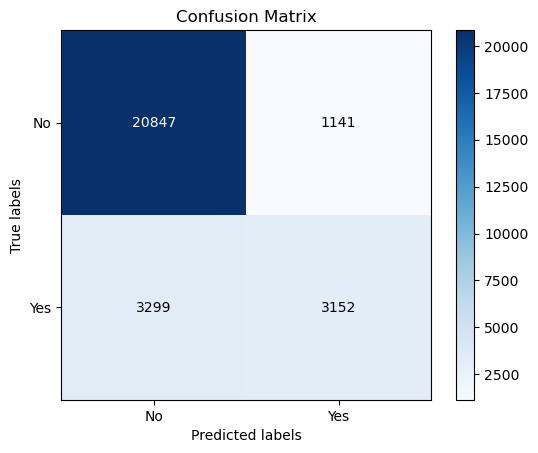



ROC Curve
------------------------------------------------------------------------------------------------------------


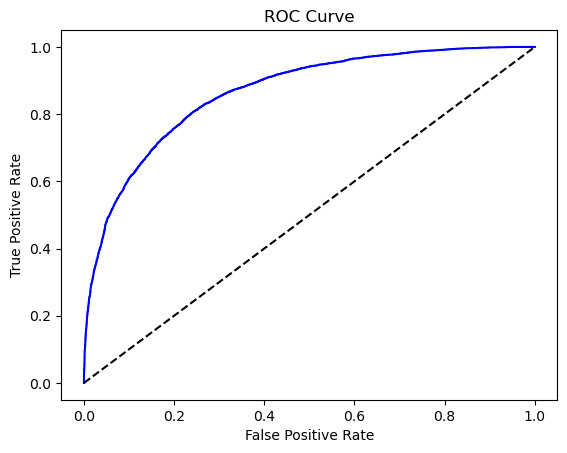



Classification report
------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     21988
         Yes       0.73      0.49      0.59      6451

    accuracy                           0.84     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439



Model Fitness
------------------------------------------------------------------------------------------------------------
Train Fitness: 0.8428
Test Fitness: 0.8439


In [ ]:
evaluate(logreg)

1. The models overall performance is great.
2. Recall is a bit low especially for days that would normally rain.
3. The fitting is also great, no significat difference between the test and train score.
4. The model prediction wiil perform better for days that will not rain than days that will rain, therefore model selection can be further determined on need basis.
   

### Hyper-parameter Tuning

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
logreg_param = {
'C':[1, 1e8, 1e16],
'fit_intercept':[True, False],
'max_iter':[50, 100, 150],
'random_state':[30]
}

logreg_gs = GridSearchCV(logreg, logreg_param, scoring = 'accuracy', cv = 3)
logreg_gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1, 100000000.0, 1e+16],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 150], 'random_state': [30]},
             scoring='accuracy')

In [ ]:
joblib.dump(logreg_gs, 'Logistic Regression/logreg_gs')

['Logistic Regression/logreg_gs']

In [ ]:
logreg_gs = joblib.load('Logistic Regression/logreg_gs')

In [ ]:
logreg_gs.best_params_

{'C': 100000000.0, 'fit_intercept': True, 'max_iter': 50, 'random_state': 30}

In [ ]:
round(logreg_gs.best_score_, 4)

0.8429

In [ ]:
y_pred_logreg_gs = logreg_gs.predict(X_test)
y_pred_logreg_gs

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Confusion Matrix
------------------------------------------------------------------------------------------------------------


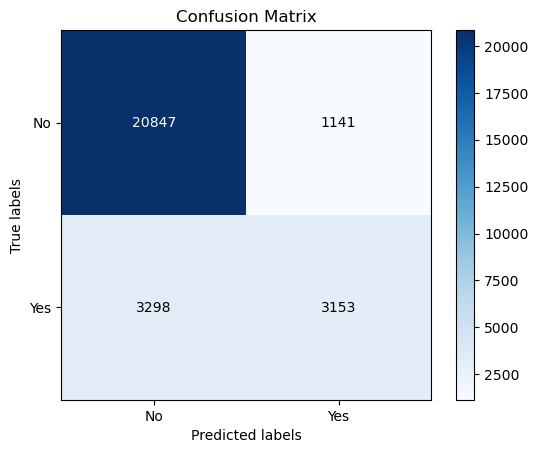



ROC Curve
------------------------------------------------------------------------------------------------------------


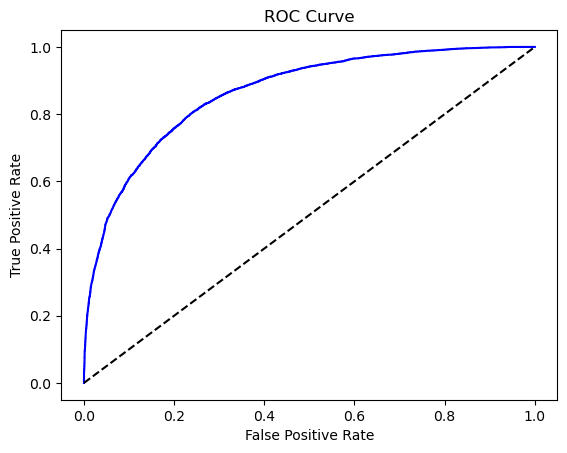



Classification report
------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     21988
         Yes       0.73      0.49      0.59      6451

    accuracy                           0.84     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439



Model Fitness
------------------------------------------------------------------------------------------------------------
Train Fitness: 0.8427
Test Fitness: 0.8439


In [ ]:
evaluate(logreg_gs, y_pred = y_pred_logreg_gs)

Upon hyperpametertuning, the tuned model is not any better than the base model.

### Comparing performance with other models

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_train_accuracy = []
k_test_accuracy = []
for i in range (1,11):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  k_train_accuracy.append(knn.score(X_train, y_train))
  k_test_accuracy.append(knn.score(X_test, y_test))



In [ ]:
knn_df = pd.DataFrame(index = range(1,11), columns = ["Train Accuracy", "Test Accuracy"])
knn_df["Train Accuracy"], knn_df["Test Accuracy"] = k_train_accuracy, k_test_accuracy
print(knn_df)

    Train Accuracy  Test Accuracy
1         1.000000       0.802665
2         0.893375       0.821794
3         0.900953       0.828932
4         0.874070       0.832554
5         0.879916       0.837828
6         0.866449       0.836387
7         0.870079       0.839129
8         0.862141       0.837969
9         0.865701       0.839586
10        0.859249       0.838250


Text(0, 0.5, 'C_values')

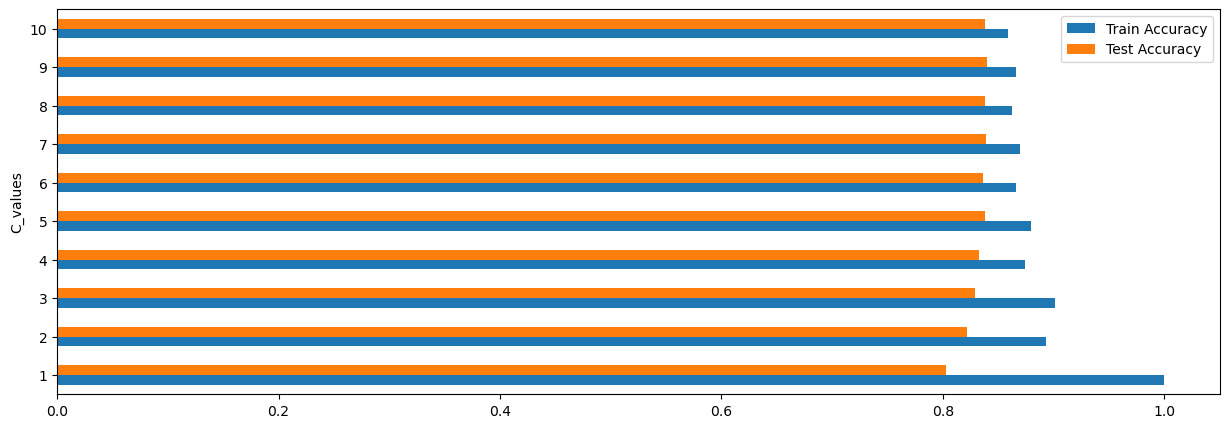

In [ ]:
knn_df.plot(kind ="barh", figsize =(15,5))
plt.ylabel("C_values")

In [ ]:
knn =KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
knn.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Confusion Matrix
------------------------------------------------------------------------------------------------------------


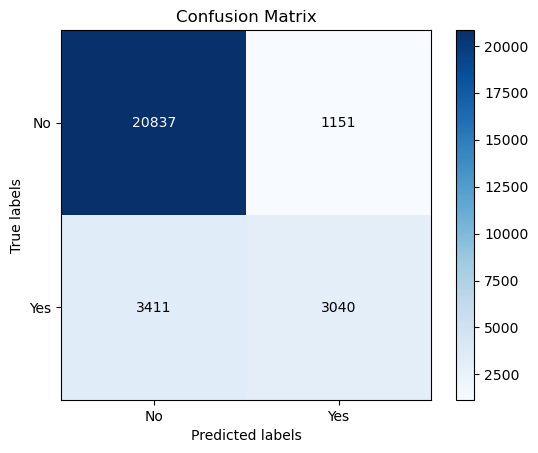



ROC Curve
------------------------------------------------------------------------------------------------------------


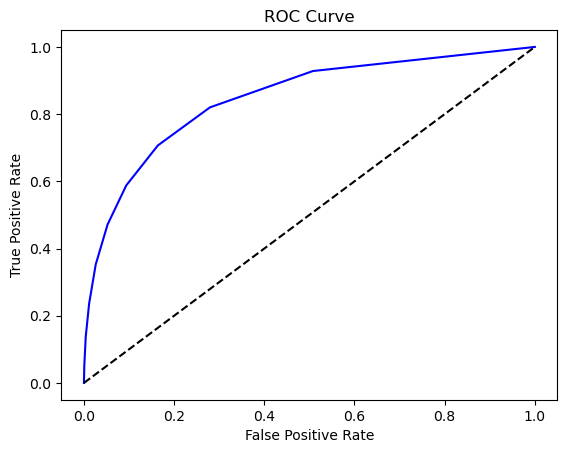



Classification report
------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     21988
         Yes       0.73      0.47      0.57      6451

    accuracy                           0.84     28439
   macro avg       0.79      0.71      0.74     28439
weighted avg       0.83      0.84      0.83     28439



Model Fitness
------------------------------------------------------------------------------------------------------------
Train Fitness: 0.8657
Test Fitness: 0.8396


In [ ]:
evaluate(knn)

1. KNN's performance is slightly lower to the logistics regression model.
2. The ROC curve looks alright, but the logistics regression model performed better in terms of recall and  f1-score, Also there is a bit of overfitting with the dataset11

In [ ]:
from sklearn.svm import SVC
c_values = [1.1, 1.3, 1.5, 1.7, 1.9]
svc_train_accuracy = []
svc_test_accuracy = []
for i in c_values:
    svm = SVC(C=i)
    svm.fit(X_train, y_train)
    svc_train_accuracy.append(svm.score(X_train, y_train))
    svc_test_accuracy.append(svm.score(X_test, y_test))


In [ ]:
svc_df = pd.DataFrame(index = c_values, columns = ["Train accuracy", "Test accuracy"])
svc_df["Train accuracy"], svc_df["Test accuracy"] = svc_train_accuracy, svc_test_accuracy
svc_df

,Train accuracy,Test accuracy
1.1,0.864541,0.851718
1.3,0.865640,0.852562
1.5,0.866765,0.853370
1.7,0.867943,0.853792
1.9,0.868805,0.853617


Text(0, 0.5, '[1.1, 1.3, 1.5, 1.7, 1.9]')

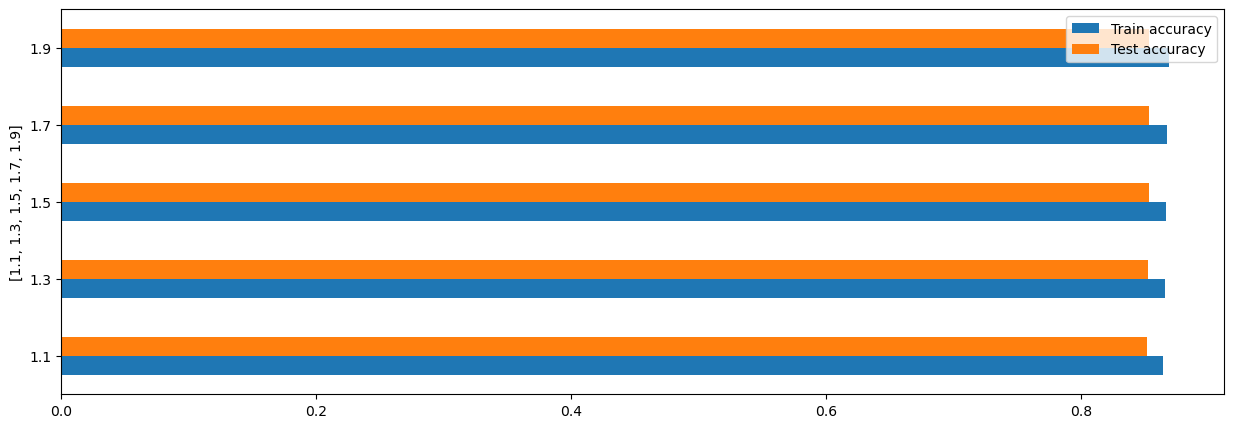

In [ ]:
svc_df.plot(kind = "barh", figsize = (15, 5))
plt.ylabel(c_values)

In [ ]:
svm = SVC(C = 1.9, probability=True)
svm.fit(X_train, y_train)
svm.predict(X_test)

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

Confusion Matrix
------------------------------------------------------------------------------------------------------------


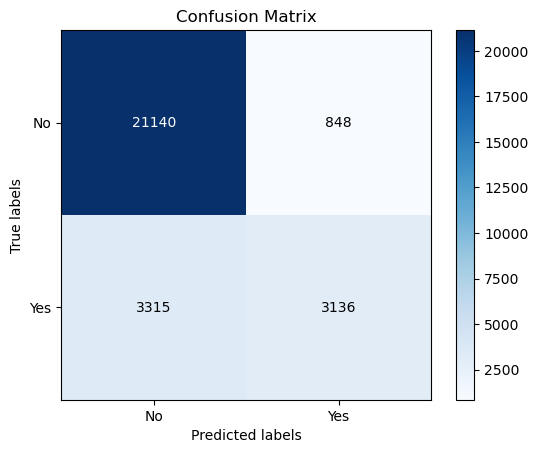



ROC Curve
------------------------------------------------------------------------------------------------------------


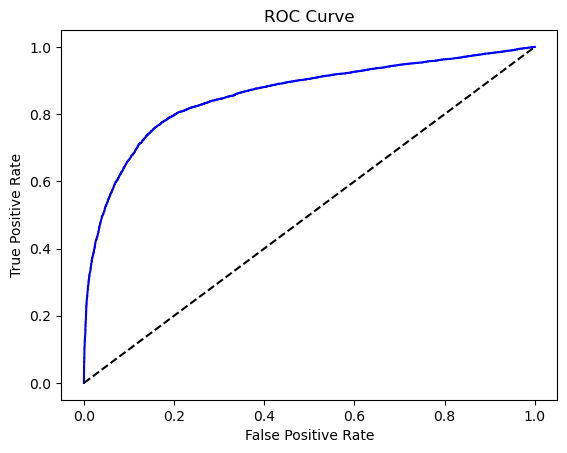



Classification report
------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.86      0.96      0.91     21988
         Yes       0.79      0.49      0.60      6451

    accuracy                           0.85     28439
   macro avg       0.83      0.72      0.76     28439
weighted avg       0.85      0.85      0.84     28439



Model Fitness
------------------------------------------------------------------------------------------------------------
Train Fitness: 0.8688
Test Fitness: 0.8536


In [ ]:
evaluate(svm)

## Conclusion


1. Support Vetor Classifier (SVC) has the best performance of all the base model.
2. Upon hyperparameter tuning, the C value of 1.9 has the best performance and it is well fitted.
3. In terms of precision, recall and f1-score, SVC model is the best performer of all models.